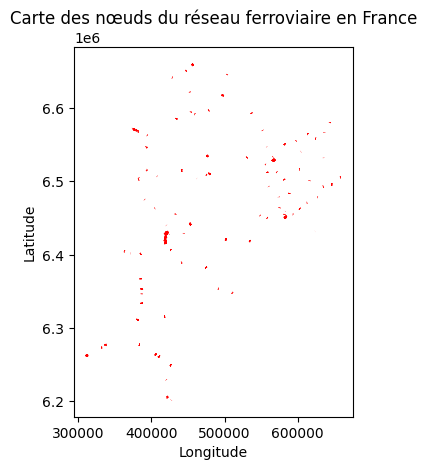

In [41]:
import pandas as pd
import geopandas as gp
import networkx as nx
import osmnx as ox
import numpy as np
from osmnx.utils import log
from pyogrio import read_dataframe, write_dataframe
from shapely.geometry import shape, Point, LineString
from shapely.ops import nearest_points
import shapely.wkt
import folium
import os

import matplotlib.pyplot as plt
%matplotlib inline

gdf_line = read_dataframe("../output/aquitaine-rail.gpkg", layer="line")

gdf_line.plot(markersize=4, color='red')
plt.title("Carte des nœuds du réseau ferroviaire en France")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [11]:
df_wagon = donnees_excel = pd.read_excel("CurrentLocations 2024-01-04 1046.xlsx")

gdf_wagon = gp.GeoDataFrame(
    donnees_excel,
    geometry=gp.points_from_xy(df_wagon.Longitude, df_wagon.Latitude),
    crs='EPSG:4326' 
)

gdf_wagon

,Event Date,Asset Type,Asset ID,Asset Group,City,Owner,Operator,Serial #,Location Type,Location,Latitude,Longitude,geometry
0,2024/01/04 9:42,Tank Car,33 87 4785 428-3,Steeltrack - Portes bobines Chaudes,"Miramas, FR",Ermewa,Steeltrack,E5AC28422,Rail Yard,Gare de triage de Miramas,43.583431,4.973637,POINT (4.97364 43.58343)
1,2024/01/04 9:42,Tank Car,33 87 4785 281-6,Steeltrack - Portes bobines Chaudes,"Miramas, FR",Ermewa,Steeltrack,E5AN16250,Rail Yard,Gare de triage de Miramas,43.583385,4.973441,POINT (4.97344 43.58339)
2,2024/01/04 9:40,Tank Car,33 87 4785 250-1,Steeltrack - Portes bobines Chaudes,"Miramas, FR",Ermewa,Steeltrack,E4AV36495,Rail Yard,Gare de triage de Miramas,43.583427,4.973242,POINT (4.97324 43.58343)
3,2024/01/04 9:18,Tank Car,33 87 4785 019-0,Steeltrack - Portes bobines Chaudes,"Miramas, FR",Ermewa,Steeltrack,E5AT16454,Rail Yard,Gare de triage de Miramas,43.584965,4.959752,POINT (4.95975 43.58496)
4,2024/01/04 9:10,Tank Car,33 87 3546 811-2,TIBER.CO SRL,"Miramas, FR",Ermewa,Ermewa,E4AC35202,Rail Yard,Gare de triage de Miramas,43.582222,4.975350,POINT (4.97535 43.58222)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2024/01/03 4:26,Tank Car,33 87 3903 335-9,ETF EUROPEENNE TRAVAUX,"Miramas, FR",Ermewa,Ermewa,E4AY38098,Maintenance,INVEHO UFF Miramas,43.580631,4.979004,POINT (4.97900 43.58063)
164,2024/01/03 3:46,Tank Car,33 84 4675 570-8,TIBER.CO SRL,"Miramas, FR",Ermewa,Ermewa,E4AZ25739,Rail Yard,Gare de triage de Miramas,43.582058,4.977254,POINT (4.97725 43.58206)
165,2024/01/03 3:36,Tank Car,33 87 0821 325-5,LAFARGEHOLCHIM CIMENTS,"Miramas, FR",Ermewa,Ermewa,E4DZ38979,Rail Yard,Gare de triage de Miramas,43.582298,4.977674,POINT (4.97767 43.58230)
166,2024/01/03 3:29,Tank Car,40 00 0002 613-6,unknown wagons,"Miramas, FR",Ermewa,Ermewa,E4AW26136,Maintenance,INVEHO UFF Miramas,43.580444,4.980784,POINT (4.98078 43.58044)


In [38]:
line_string = ["LINESTRING (-2.15 8.9, -2.15 8.93)", "LINESTRING (-1.15 9.9, -1.15 9.93)"]
point = "POINT (5.41 3.9)"

gdf_p = gp.GeoDataFrame(geometry=[shapely.wkt.loads(point)])
gdf_l = gp.GeoDataFrame(geometry=pd.Series(line_string).apply(shapely.wkt.loads))

df_n = gp.sjoin_nearest(gdf_p, gdf_l).merge(gdf_l, left_on="index_right", right_index=True)

df_n

,geometry_x,index_right,geometry_y
0,POINT (5.41000 3.90000),1,"LINESTRING (-1.15000 9.90000, -1.15000 9.93000)"


In [43]:
line_string = LineString([(-1.15, 9.9), (-1.15, 9.93), (-2.15, 8.9), (-2.15, 8.93)])

point = Point(5.41, 3.9)

mymap = folium.Map(location=[line_string.coords[0][1], line_string.coords[0][0]], zoom_start=10)

print(f'{line_string.coords[0][1]} and {line_string.coords[0][0]}')

folium.PolyLine(locations=[(lat, lon) for lon, lat in line_string.coords], color='blue', weight=5, opacity=0.7).add_to(mymap)
folium.Marker(location=[point.y, point.x], popup='Point', icon=folium.Icon(color='red')).add_to(mymap)

mymap.save('carte.html')

9.9 and -1.15
